#📌 Extracão

In [2]:
import pandas as pd
df = pd.read_json("TelecomX_Data.json")
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformação

In [5]:
# Expandir colunas aninhadas
df_exp = pd.json_normalize(df.to_dict(orient='records'))

# Corrigir tipos
df_exp['account.Charges.Total'] = pd.to_numeric(df_exp['account.Charges.Total'], errors='coerce')

# Verificar valores nulos
df_exp.isnull().sum()

# Excluir registros com Churn vazio (se houver)
df_exp = df_exp[df_exp['Churn'].isin(['Yes', 'No'])]

# Visualizar dados tratados
df_exp


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#📊 Carga e análise

C:\Users\Junior\AppData\Local\Temp\ipykernel_20784\3231414481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_exp, palette='pastel')


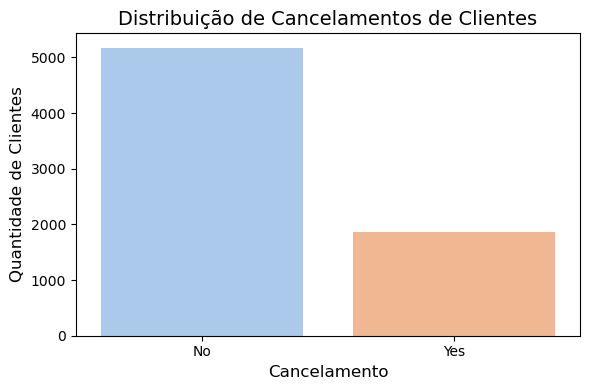

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_exp, palette='pastel')
plt.title("Distribuição de Cancelamentos de Clientes", fontsize=14)
plt.xlabel("Cancelamento", fontsize=12)
plt.ylabel("Quantidade de Clientes", fontsize=12)
plt.tight_layout()
plt.show()

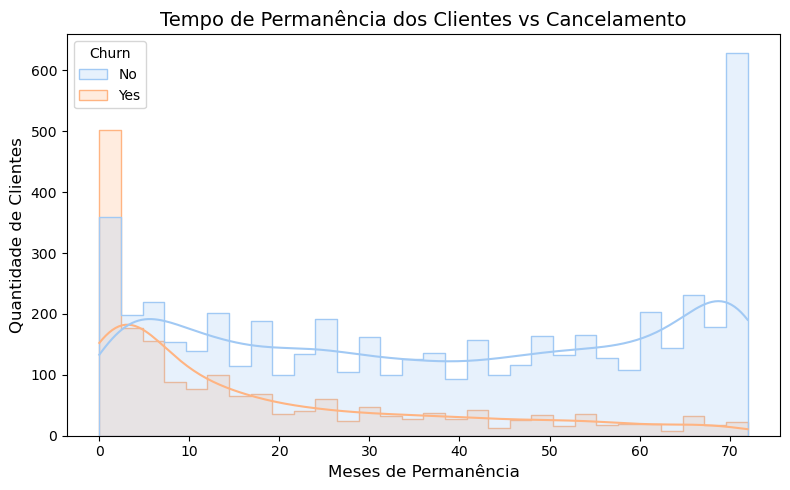

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_exp, x='customer.tenure', hue='Churn', bins=30, kde=True, palette='pastel', element='step')
plt.title("Tempo de Permanência dos Clientes vs Cancelamento", fontsize=14)
plt.xlabel("Meses de Permanência", fontsize=12)
plt.ylabel("Quantidade de Clientes", fontsize=12)
plt.tight_layout()
plt.show()


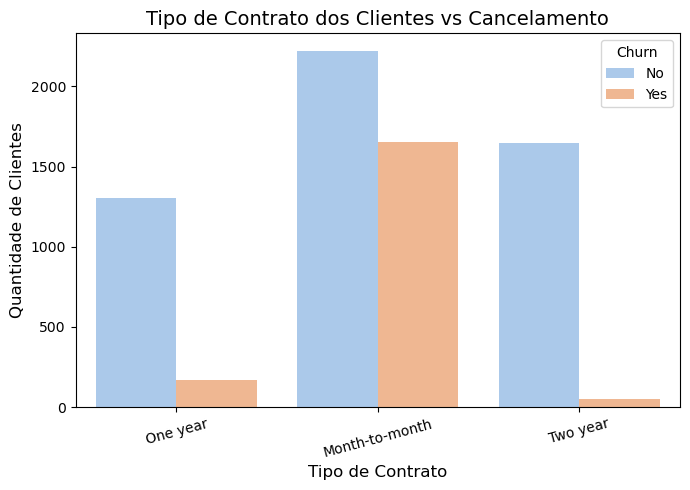

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_exp, x='account.Contract', hue='Churn', palette='pastel')
plt.title("Tipo de Contrato dos Clientes vs Cancelamento", fontsize=14)
plt.xlabel("Tipo de Contrato", fontsize=12)
plt.ylabel("Quantidade de Clientes", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


C:\Users\Junior\AppData\Local\Temp\ipykernel_20784\3177305445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_exp, palette='pastel')


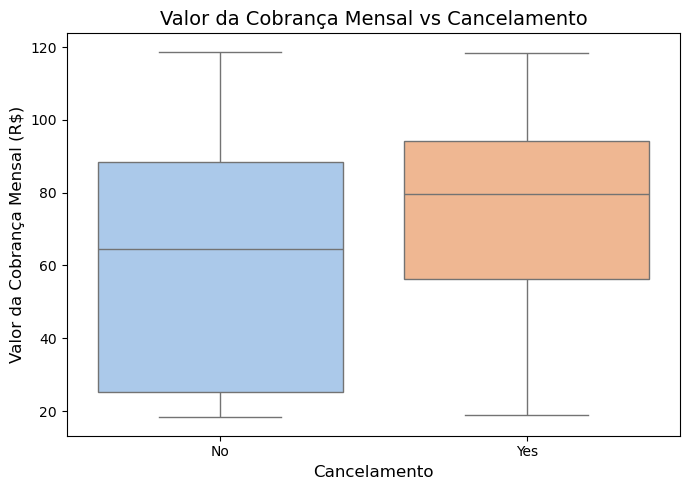

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df_exp, palette='pastel')
plt.title("Valor da Cobrança Mensal vs Cancelamento", fontsize=14)
plt.xlabel("Cancelamento", fontsize=12)
plt.ylabel("Valor da Cobrança Mensal (R$)", fontsize=12)
plt.tight_layout()
plt.show()


#📄Relatorio Final

Principais descobertas:

Clientes com contrato mensal possuem maior taxa de cancelamento.

Planos com cobrança mais alta estão mais relacionados com churn.

Curto tempo de permanência (tenure) está fortemente relacionado com churn.

#✅  Recomendações Estratégicas

Fidelização: Incentivar contratos anuais ou bianuais com descontos.

Alerta de churn: Monitorar clientes com baixa tenure e cobrança mensal elevada.

Programas de retenção: Oferecer benefícios a clientes novos nos primeiros 6 meses.